In [2]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-71.08188546111674 -67.64864075026945
57.368563716222724 -124.19647294645029
-10.922778004875568 -167.95601591691522
-42.84376381598038 -29.824101851450365
-7.774078305022854 77.63141552901129
64.89624103415895 4.832549042980133
82.44411527129691 100.20889482583681
-2.7146359803149664 120.40084000431852
-46.3807406770005 -160.33677940605853
23.947204877930574 -1.0071366944017655
1.4586348300260426 -148.31807933014218
59.64145525464767 90.8032229142986
-64.52223238612274 169.51278007738551
87.20935581611349 -141.51010966333982
-53.16551350923505 -134.72379830498448
-72.74536718427295 -174.0747376680152
-44.91333488055402 93.31401716143012
-11.378945160654837 -126.69779094081876
-79.32673114566057 -52.850785344112296
19.49647452025428 -51.33016330637824
52.23577000125994 -123.68676256710165
-56.44956616481522 166.83746625149416
-32.49339696402199 -2.5868238344864665
-56.688190495847785 162.8930853530979
-18.150620236619957 41.95452288445145
-51.40698210047063 -83.43694860236123
30.450916

-79.90793187799814 81.94752070240054
7.521438309938418 -176.8727472727843
-86.89894751104181 -70.21311519591427
-45.54220022502006 144.48059117389965
-88.28233989217472 -113.4967085154367
-89.16326572003625 -119.8650142387475
56.46217943733953 9.524722098217978
-18.44080993915584 56.393551631285135
77.63322994024415 -118.46591441710007
84.894292655009 101.26553517510911
36.104754086822894 -14.103307401988246
10.853353471782881 176.85315207505926
53.72878348660822 23.346774567703932
59.04470879176279 89.66002900540127
-26.290490863791504 -18.266102221320295
-7.8038172444362885 34.57909296723136
-13.834297769108957 -43.861405572080145
67.04172613957277 -127.03423694305299
-19.52521233546541 -31.7675847030674
-72.78040737388405 -35.715064828415905
-5.833422386913028 6.7415974787726896
47.67008403616242 -169.31178776344473
59.18092757002947 90.2733133735677
-20.08713632163662 -68.81801340811641
-65.85987767594953 109.97630734470425
-48.70961943016857 -73.07060668531746
-63.03221937249575 -

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fb10021c1ec1bac6ff67f37e96177147


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | fort nelson
Processing Record 3 of Set 1 | samusu
City not found. Skipping...
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | roald
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | rantepao
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | taoudenni
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | yeniseysk
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | bathsheba
Processing Record 19 of Set 1 | quesnel
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | angoche
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | tubruq
City not found. Skipping...
Processi

Processing Record 39 of Set 4 | provideniya
Processing Record 40 of Set 4 | barcarena
Processing Record 41 of Set 4 | monroe
Processing Record 42 of Set 4 | sawang daen din
Processing Record 43 of Set 4 | richards bay
Processing Record 44 of Set 4 | kungurtug
Processing Record 45 of Set 4 | sinnamary
Processing Record 46 of Set 4 | lebu
Processing Record 47 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 48 of Set 4 | bengkulu
Processing Record 49 of Set 4 | bredasdorp
Processing Record 50 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 1 of Set 5 | aykhal
Processing Record 2 of Set 5 | cape canaveral
Processing Record 3 of Set 5 | longyearbyen
Processing Record 4 of Set 5 | emilio carranza
Processing Record 5 of Set 5 | esna
Processing Record 6 of Set 5 | swift current
Processing Record 7 of Set 5 | hamilton
Processing Record 8 of Set 5 | marawi
Processing Record 9 of Set 5 | tiznit
Processing Record 10 of Set 5 | koszalin
Processing Record 11 of

Processing Record 27 of Set 8 | bac lieu
Processing Record 28 of Set 8 | cururupu
Processing Record 29 of Set 8 | pringsewu
Processing Record 30 of Set 8 | lorengau
Processing Record 31 of Set 8 | jiaojiang
Processing Record 32 of Set 8 | panguna
Processing Record 33 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 34 of Set 8 | virginia beach
Processing Record 35 of Set 8 | foix
Processing Record 36 of Set 8 | lavrentiya
Processing Record 37 of Set 8 | marathon
Processing Record 38 of Set 8 | cutervo
Processing Record 39 of Set 8 | barranca
Processing Record 40 of Set 8 | aurillac
Processing Record 41 of Set 8 | gawler
Processing Record 42 of Set 8 | yining
Processing Record 43 of Set 8 | kahului
Processing Record 44 of Set 8 | dunedin
Processing Record 45 of Set 8 | brae
Processing Record 46 of Set 8 | pangai
Processing Record 47 of Set 8 | srebrenik
Processing Record 48 of Set 8 | khasan
Processing Record 49 of Set 8 | mazamari
Processing Record 50 of Set 8 | labuh

Processing Record 18 of Set 12 | forbes
Processing Record 19 of Set 12 | ghatanji
Processing Record 20 of Set 12 | kenai
Processing Record 21 of Set 12 | miri
Processing Record 22 of Set 12 | along
Processing Record 23 of Set 12 | gizo
Processing Record 24 of Set 12 | aktas
Processing Record 25 of Set 12 | cefalu
Processing Record 26 of Set 12 | veraval
Processing Record 27 of Set 12 | nuuk
Processing Record 28 of Set 12 | hailey
Processing Record 29 of Set 12 | tarancon
Processing Record 30 of Set 12 | turan
Processing Record 31 of Set 12 | komsomolskiy
Processing Record 32 of Set 12 | warqla
City not found. Skipping...
Processing Record 33 of Set 12 | srostki
Processing Record 34 of Set 12 | salaga
Processing Record 35 of Set 12 | westport
Processing Record 36 of Set 12 | harper
Processing Record 37 of Set 12 | vila franca do campo
Processing Record 38 of Set 12 | malanje
Processing Record 39 of Set 12 | yantai
Processing Record 40 of Set 12 | elliot lake
Processing Record 41 of Set 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.26,49,20,10.36,AR,2022-09-14 23:37:43
1,Fort Nelson,58.8053,-122.7002,74.79,27,75,8.05,CA,2022-09-14 23:36:19
2,Arraial Do Cabo,-22.9661,-42.0278,69.76,88,75,9.22,BR,2022-09-14 23:37:44
3,Hithadhoo,-0.6000,73.0833,80.89,71,66,3.18,MV,2022-09-14 23:37:44
4,Roald,62.5833,6.1333,53.76,81,75,13.80,NO,2022-09-14 23:37:44
5,Khatanga,71.9667,102.5000,34.05,97,100,13.40,RU,2022-09-14 23:37:45
6,Rantepao,-2.9701,119.8978,69.06,87,100,1.59,ID,2022-09-14 23:37:45
7,Avarua,-21.2078,-159.7750,80.65,65,20,19.57,CK,2022-09-14 23:37:46
8,Taoudenni,22.6783,-3.9836,96.37,8,0,7.52,ML,2022-09-14 23:37:46
9,Atuona,-9.8000,-139.0333,77.00,71,12,15.03,PF,2022-09-14 23:37:46


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1663199612.829586

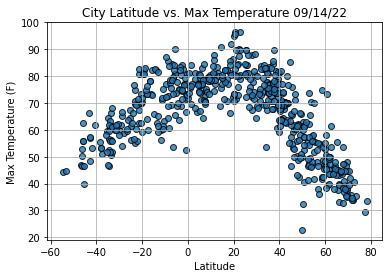

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

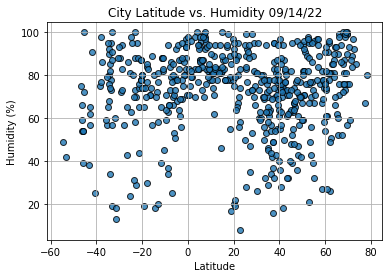

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

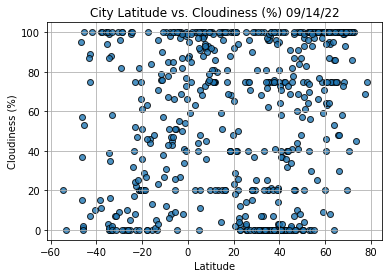

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


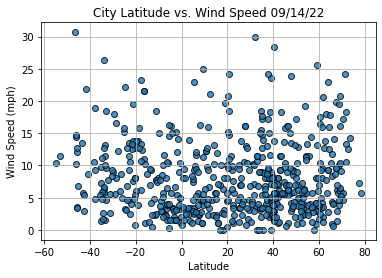

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"]>=0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Fort Nelson,58.8053,-122.7002,74.79,27,75,8.05,CA,2022-09-14 23:36:19
4,Roald,62.5833,6.1333,53.76,81,75,13.80,NO,2022-09-14 23:37:44
5,Khatanga,71.9667,102.5000,34.05,97,100,13.40,RU,2022-09-14 23:37:45
8,Taoudenni,22.6783,-3.9836,96.37,8,0,7.52,ML,2022-09-14 23:37:46
10,Yeniseysk,58.4497,92.1703,41.56,82,100,3.20,RU,2022-09-14 23:37:47
...,...,...,...,...,...,...,...,...,...
555,Peniche,39.3558,-9.3811,69.30,94,14,8.03,PT,2022-09-14 23:53:28
556,Semey,50.4111,80.2275,32.22,80,0,8.95,KZ,2022-09-14 23:53:29
559,Tooele,40.5308,-112.2983,63.52,63,40,13.80,US,2022-09-14 23:53:30
562,Nanchong,30.7951,106.0847,68.29,95,100,4.09,CN,2022-09-14 23:53:31


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Fort Nelson,58.8053,-122.7002,74.79,27,75,8.05,CA,2022-09-14 23:36:19
4,Roald,62.5833,6.1333,53.76,81,75,13.80,NO,2022-09-14 23:37:44
5,Khatanga,71.9667,102.5000,34.05,97,100,13.40,RU,2022-09-14 23:37:45
8,Taoudenni,22.6783,-3.9836,96.37,8,0,7.52,ML,2022-09-14 23:37:46
10,Yeniseysk,58.4497,92.1703,41.56,82,100,3.20,RU,2022-09-14 23:37:47


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

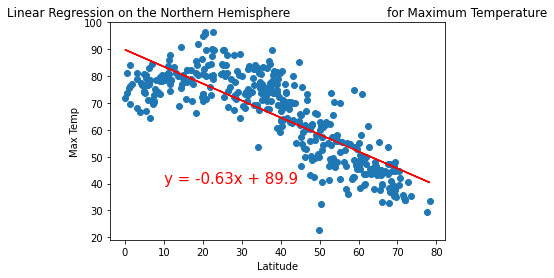

In [25]:
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

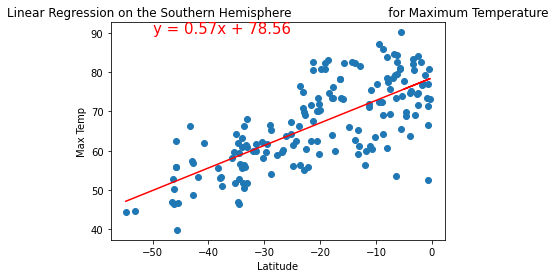

In [26]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

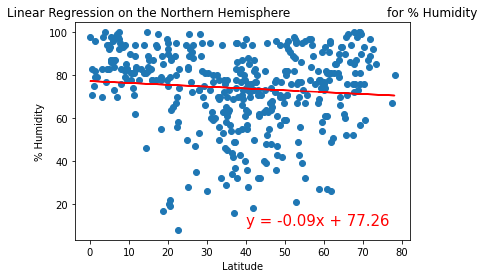

In [27]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

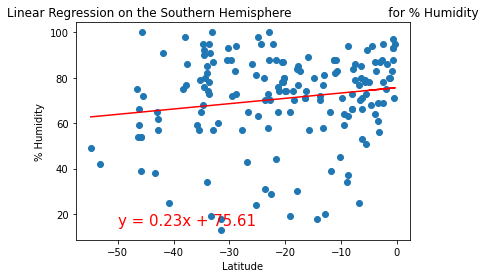

In [28]:
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

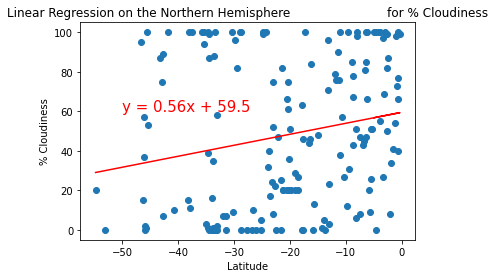

In [29]:
# Linear regression on the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

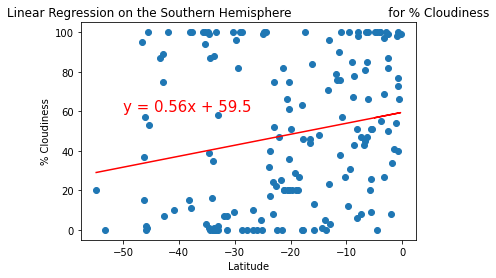

In [30]:
# Linear regression on the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

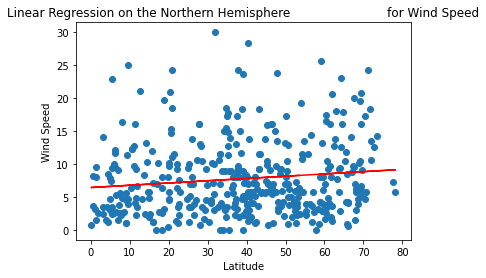

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

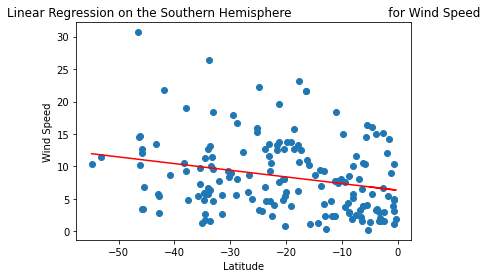

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))